In [30]:
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
msg = pd.read_csv('spam.csv',encoding='latin-1')
msg.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
msg = msg.rename(columns={'v1':'class','v2':'text'})
msg.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
msg.groupby('class').describe()

text                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c472a3c50>,
      dtype=object)

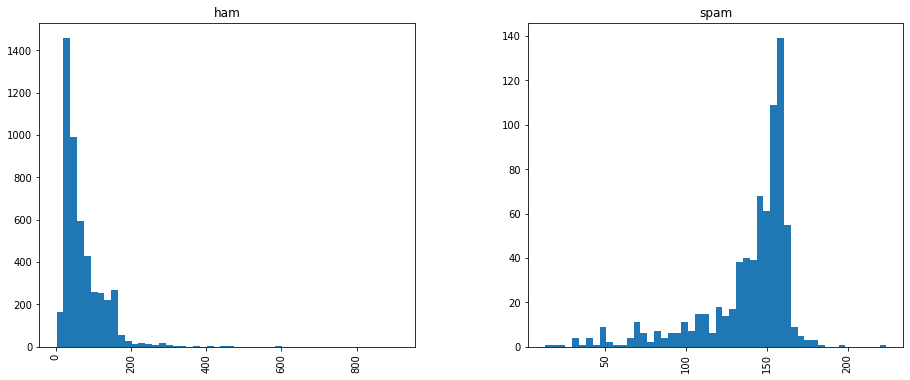

In [15]:
msg['length'] = msg['text'].apply(len)
msg.hist(column='length',by='class',bins=50,figsize=(15,6))

In [17]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

In [20]:
msg['text'].apply(process_text).head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

In [21]:
msg_train,msg_test,class_train,class_test = train_test_split(msg['text'],msg['class'],test_size=0.2)

In [22]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=process_text)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [23]:
pipeline.fit(msg_train,class_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x7f3c46482a60>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [24]:
predictions = pipeline.predict(msg_test)

In [25]:
print(classification_report(class_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       972
        spam       1.00      0.72      0.84       143

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.97      0.96      0.96      1115



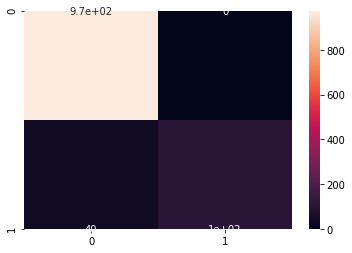

In [26]:
import seaborn as sns
sns.heatmap(confusion_matrix(class_test,predictions),annot=True)

In [29]:
excr = [
    'You have won 1 bn dollar lottery',
    'Hi, I miss you.',
    'Contact customer care service for more details.',
    'Tomorrow’s meeting is scheduled at 1: 30 pm',
    'You can fool all the people some of the time, and you can fool some of the people all the time, but you can not fool all the people all the time.',
    'Not my circus not my monkey.',
    'They say teaching is like walking in a park, what they don’t say is that the park is the Jurrasic park.'
]
predictions1 = pipeline.predict(excr)
predictions1

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham'], dtype='<U4')

In [32]:
pipeline1 = Pipeline([
    ('bow',CountVectorizer(analyzer=process_text)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [34]:
pipeline1.fit(msg_train,class_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x7f3c46482a60>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_node

In [38]:
predictions2 = pipeline1.predict(msg_test)
print(classification_report(class_test,predictions2))

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       972
        spam       0.93      0.80      0.86       143

    accuracy                           0.97      1115
   macro avg       0.95      0.90      0.92      1115
weighted avg       0.97      0.97      0.97      1115



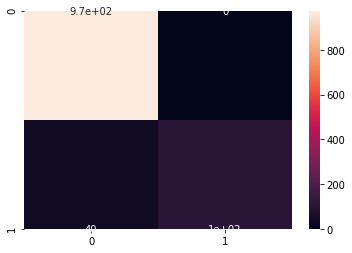

In [40]:
sns.heatmap(confusion_matrix(class_test,predictions),annot=True)

In [42]:
predictions3 = pipeline1.predict(excr)
predictions3

array(['ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham'], dtype=object)

In [48]:
email = pd.read_csv('email.csv')
email = email.rename(columns={'email':'text'})
email.head()

,text,class
0,"Subject: what up , , your cam babe what are yo...",spam
1,Subject: want to make more money ? order confi...,spam
2,Subject: food for thoughts [ join now - take a...,spam
3,Subject: your pharmacy ta would you want cheap...,spam
4,Subject: bigger breast just from a pill image ...,spam


In [50]:
email.groupby('class').describe()

text                                                               
       count unique                                                top freq
class                                                                      
ham     8774   8336  Subject: calpine daily gas nomination > ricky ...   20
spam   11224   9494                                         Subject:     51

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c2eff8518>,
      dtype=object)

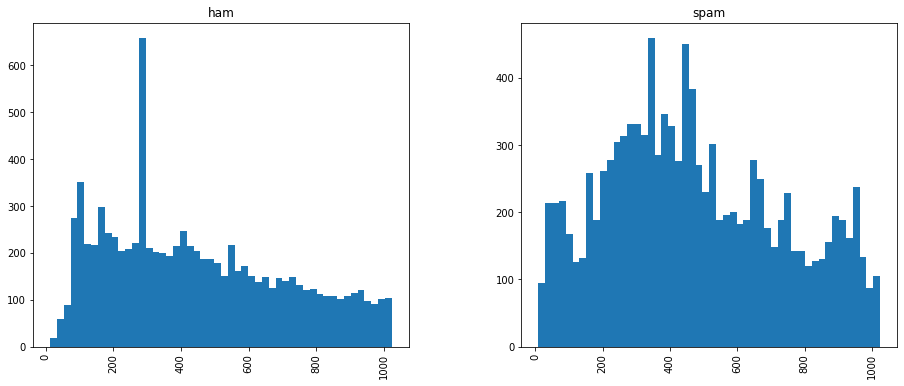

In [56]:
email['length'] = email['text'].apply(len)
email.hist(column='length',by='class',bins=50,figsize=(15,6))

In [101]:
email['text'].apply(process_text).head()

0    [Subject, cam, babe, looking, looking, compani...
1    [Subject, want, make, money, order, confirmati...
2    [Subject, food, thoughts, join, take, free, to...
3    [Subject, pharmacy, ta, would, want, cheap, pe...
4    [Subject, bigger, breast, pill, image, loading...
Name: text, dtype: object

In [102]:
email_train,email_test,eClass_train,eClass_test = train_test_split(email['text'],email['class'],test_size=0.2)
pipeline2 = Pipeline([
    ('bow',CountVectorizer(analyzer=process_text)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])
pipeline2.fit(email_train,eClass_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x7f3c46482a60>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [103]:
predictions4 = pipeline2.predict(email_test)
print(classification_report(eClass_test,predictions4))

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98      1693
        spam       0.99      0.99      0.99      2307

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



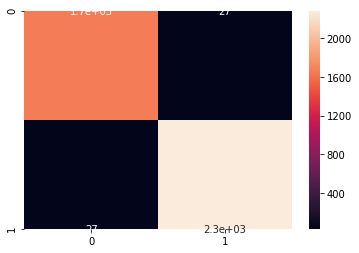

In [104]:
sns.heatmap(confusion_matrix(eClass_test,predictions4),annot=True)

In [106]:
prediction5 = pipeline2.predict(excr)
prediction5

array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'spam'], dtype='<U4')

In [132]:
ctest = class_test.array
mtest = msg_test.array
df = {'msg':[],'class':[],'prediction':[]}
wmsg = pd.DataFrame(df1)
for i in range(len(predictions)):
    if(predictions[i] != ctest[i]):
        new_row = {'msg':mtest[i],'class':ctest[i],'prediction':predictions[i]}
        wmsg = wmsg.append(new_row, ignore_index=True)
wmsg

,msg,class,prediction
0,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...,spam,ham
1,Free msg: Single? Find a partner in your area!...,spam,ham
2,Got what it takes 2 take part in the WRC Rally...,spam,ham
3,"Hi, the SEXYCHAT girls are waiting for you to ...",spam,ham
4,Orange brings you ringtones from all time Char...,spam,ham
5,Free-message: Jamster!Get the crazy frog sound...,spam,ham
6,You have 1 new message. Please call 08715205273,spam,ham
7,thesmszone.com lets you send free anonymous an...,spam,ham
8,I don't know u and u don't know me. Send CHAT ...,spam,ham
9,ROMCAPspam Everyone around should be respondin...,spam,ham


In [130]:
ctest1 = eClass_test.array
mtest1 = email_test.array
df1 = {'msg':[],'class':[],'prediction':[]}
wmsg1 = pd.DataFrame(df1)
for i in range(len(predictions4)):
    if(predictions4[i] != ctest1[i]):
        new_row = {'msg':mtest1[i],'class':ctest1[i],'prediction':predictions4[i]}
        wmsg1 = wmsg1.append(new_row, ignore_index=True)
wmsg1

,msg,class,prediction
0,"Subject: referred by , james hi , i found foll...",spam,ham
1,Subject: important video announcement i have a...,ham,spam
2,Subject: new schedule councilwomen aloft ringe...,spam,ham
3,Subject: re : billing question thank you for y...,ham,spam
4,Subject: yummy frappachino hey let ' s go get ...,ham,spam
5,Subject: [ blacken ] 84 % - off vicodin . puri...,spam,ham
6,Subject: peter g [ tour dates ] tour dates fri...,spam,ham
7,Subject: re [ 13 ] : dr . dree ricky martin in...,spam,ham
8,Subject: rodrigo lamas - best wishes i would l...,ham,spam
9,Subject: help chinesse new year i ' ll take it...,spam,ham


In [ ]:
'''
The given UTC SMS data set is biased towards the ham messages because it contains
4516 distinct ham messages and only 653 spam messages.
So the Naive Bayes model predicts ham correctly but not spams.
Ex.: Recall score for spam is 0.72 only and for ham it is 1.0

By using Decision Tree classifier this does't improve that much.
Ex. Recall for ham is 0.99 and for spam it is 0.80 only

To improve spam detection performance we need to use a fair balanced dataset between ham
and spam messages.
The second used data set has 8774 ham messages and 11224 spam messages.
We can see that the recall for that dataset is:
0.98 for ham and 0.99 for spam.
'''